In [65]:
# Homework 2
# Mujeeb Quadri
# 10/28/2021
# SID: 801157040

# The diabetes dataset from the given csv file
# will used for building a logistic regression
# binary classifier, a Naive Bayes binary classifier,
# and those steps will be repeated using KFold cross-validation
# for training and validation.

# Importing necessary libraries here:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
# Problem 1: Building a logistic regression binary classifier (for positive diabetes

In [67]:
# Loading diabetes csv as dataset:
dataset = pd.read_csv('https://raw.githubusercontent.com/mquadriuncc/MLHW/main/diabetes.csv')

In [68]:
# Displaying data from csv file
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
# From Data set:
X = dataset.iloc[:, [0,1,2,3,4,5,6,7]] 
Y = dataset.iloc[:, 8]
# Displaying data:
X[0:15]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [70]:
#Now we’ll split our Data set into Training Data and Test Data. Training data will be u
#Logistic model and Test data will be used to validate our model. We’ll use Sklearn to 
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state
= 0)  # Test size given from 80/20 split, 20 for test split.                                                                                          

In [71]:
#Now we’ll do feature scaling to scale our data between 0 and 1 to get better accuracy.
#Here Scaling is important because there is a huge difference between Age and Estimated
 
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test) 

In [72]:
#Import LogisticRegression from sklearn.linear_model 
#Make an instance classifier of the object LogisticRegression and give random_state =  
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [73]:
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [74]:
from sklearn.metrics import confusion_matrix 
con_mat=confusion_matrix(Y_test, Y_pred)
print(con_mat)

[[98  9]
 [18 29]]


In [75]:
# Getting first set of metrics (accuracy, precision, and recall)

from sklearn import metrics
print("Value of Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Value of Precision:",metrics.precision_score(Y_test, Y_pred))
print("Value of Recall:",metrics.recall_score(Y_test, Y_pred))

Value of Accuracy: 0.8246753246753247
Value of Precision: 0.7631578947368421
Value of Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted Value')

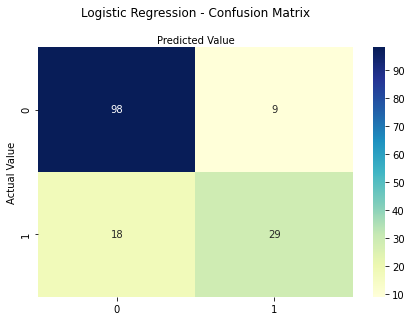

In [76]:
#Confusion Matrix Graph
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(con_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logistic Regression - Confusion Matrix', y=1.1)
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')

In [77]:
# Problem 2: Building Naive Bayes binary classifier (for positive diabetes) 

In [78]:
# Using Naive Bayes:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [79]:
con_mat2 = confusion_matrix(Y_test, Y_pred)
print(con_mat2)
print("Value of Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Value of Precision:",metrics.precision_score(Y_test, Y_pred))
print("Value of Recall:",metrics.recall_score(Y_test, Y_pred))

[[93 14]
 [18 29]]
Value of Accuracy: 0.7922077922077922
Value of Precision: 0.6744186046511628
Value of Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted Value')

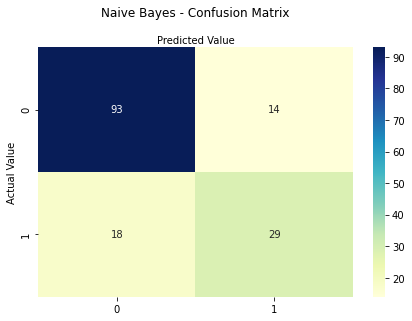

In [80]:
# Class names:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cn_m2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Naive Bayes - Confusion Matrix', y=1.1)
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')

In [81]:
# Problem 3: Problem 1 repeated using KFold cross-validation

In [82]:
# Importing libraries for KFolds, score, cross validation, and the mean:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_validate
from numpy import mean

# The KFolds will be represented by n_splits, 5, followed by 10:
KF5 = KFold(n_splits=5, random_state=1, shuffle=True)
model = GaussianNB()

score = ['accuracy','precision','recall']

result = cross_validate(model, X, Y, scoring=score, cv=KF5, n_jobs=-1)

print("Results for 5 KFolds:")

print("Value of Accuracy:",mean(final_scores['test_accuracy']))
print("Value of Precision:",mean(final_scores['test_precision']))
print("Value of Recall:",mean(final_scores['test_recall']))

Results for 5 KFolds:
Value of Accuracy: 0.7564764183185236
Value of Precision: 0.6652269630530501
Value of Recall: 0.600860189563338


In [83]:
KF10 = KFold(n_splits=10, random_state=1, shuffle=True)
model = GaussianNB()

score = ['accuracy','precision','recall']
result = cross_validate(model, X, Y, scoring=score, cv=KF10, n_jobs=-1)

print("Results for 10 KFolds:")

print("Value of Accuracy:",mean(final_scores['test_accuracy']))
print("Value of Precision:",mean(final_scores['test_precision']))
print("Value of Recall:",mean(final_scores['test_recall']))

Results for 10 KFolds:
Value of Accuracy: 0.7564764183185236
Value of Precision: 0.6652269630530501
Value of Recall: 0.600860189563338


In [84]:
# When comparing Problem 3 to Problem 1,
# Both the 5 KFold and 10 KFold cross validation
# methods resulted in lower values for all three
# metrics.

In [85]:
# Problem 4: Problem 2 repeated using KFold cross-validation

In [86]:
# The KFolds will be represented by n_splits, 5, followed by 10:
KF5 = KFold(n_splits=5, random_state=1, shuffle=True)
model = GaussianNB()

score = ['accuracy','precision','recall']
result = cross_validate(model, X, Y, scoring=score, cv=KF5, n_jobs=-1)

print("Results for 5 KFolds:")

print("Value of Accuracy:",mean(final_scores['test_accuracy']))
print("Value of Precision:",mean(final_scores['test_precision']))
print("Value of Recall:",mean(final_scores['test_recall']))

Results for 5 KFolds:
Value of Accuracy: 0.7564764183185236
Value of Precision: 0.6652269630530501
Value of Recall: 0.600860189563338


In [87]:
KF10 = KFold(n_splits=10, random_state=1, shuffle=True)
model = GaussianNB()

score = ['accuracy','precision','recall']
result = cross_validate(model, X, Y, scoring=score, cv=KF10, n_jobs=-1)

print("Results for 10 KFolds:")

print("Value of Accuracy:",mean(final_scores['test_accuracy']))
print("Value of Precision:",mean(final_scores['test_precision']))
print("Value of Recall:",mean(final_scores['test_recall']))

Results for 10 KFolds:
Value of Accuracy: 0.7564764183185236
Value of Precision: 0.6652269630530501
Value of Recall: 0.600860189563338


In [88]:
# This makes sense, as it shows that KFold cross
# validation results in data that is less
# useful for accuracy, precision, and recall.

# This is the case for either 5 KFold or 10 KFold,
# when used for both evaluation in Problem 1 or 2.